In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from matplotlib import pyplot as plt

from utils import utils

In [7]:
df, df_cv = utils.Utils.load_data(drop_neutral=False)
# df = df.sample(n=50000)

X_train = df['text']
y_train = df['label']

In [8]:
tokenizer = utils.NLTKTokenizer()

X_train = X_train.apply(tokenizer.tokenize)

40

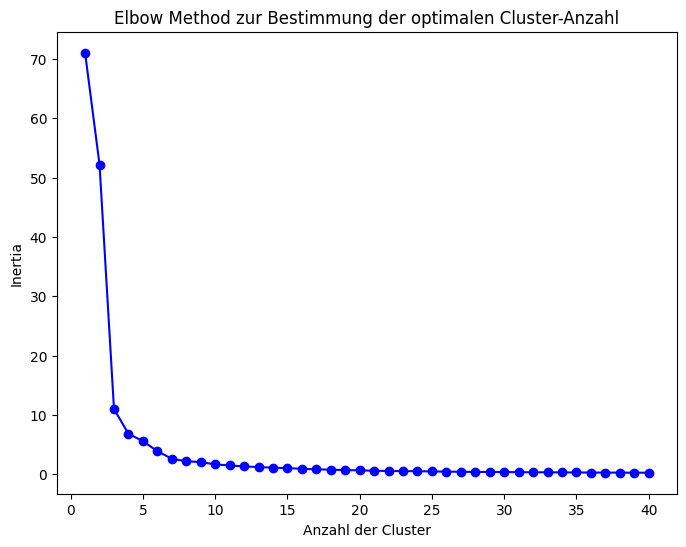

In [9]:
# 3. TF-IDF Vektorisierung
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

# 4. Dynamische Bestimmung der PCA-Komponenten
n_components = min(2, X_train_tfidf.shape[1])
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_tfidf)

# 5. Elbow Method zur Bestimmung der optimalen Cluster-Anzahl
inertia = []
max_clusters = min(40, len(X_train_pca))
display(max_clusters)
K = range(1, max_clusters + 1)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method zur Bestimmung der optimalen Cluster-Anzahl')
plt.show()

In [10]:
X_train = X_train.apply(tokenizer.tokenize)

vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_tfidf)

fig = px.scatter_3d(
    x=X_train_pca[:50000, 0], 
    y=X_train_pca[:50000, 1], 
    z=X_train_pca[:50000, 2],
    color=y_train,
    labels={'color': 'Sentiment'},
    title='K-Means Clustering von Bitcoin Tweets',
    hover_data={'PCA 1': X_train_pca[:50000, 0], 'PCA 2': X_train_pca[:50000, 1], 'PCA 3': X_train_pca[:50000, 2]}
)

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    legend_title='Sentiment',
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()
